 #  A Whale off the Port(folio)
 ---

 In this assignment, you'll get to use what you've learned this week to evaluate the performance among various algorithmic, hedge, and mutual fund portfolios and compare them against the S&P 500 Index.

In [ ]:
# Initial imports
import pandas as pd
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt
from pathlib import Path

%matplotlib inline

# Data Cleaning

In this section, you will need to read the CSV files into DataFrames and perform any necessary data cleaning steps. After cleaning, combine all DataFrames into a single DataFrame.

Files:

* `whale_returns.csv`: Contains returns of some famous "whale" investors' portfolios.

* `algo_returns.csv`: Contains returns from the in-house trading algorithms from Harold's company.

* `sp500_history.csv`: Contains historical closing prices of the S&P 500 Index.

## Whale Returns

Read the Whale Portfolio daily returns and clean the data

In [2]:
Path.cwd()

WindowsPath('C:/Users/twigi/FT_BootCamp/W4_Assignment/pandas-homework')

In [3]:
# Reading whale returns
whale_df = pd.read_csv('./Resources/whale_returns.csv', index_col = 'Date', parse_dates = True, infer_datetime_format = True)
whale_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1060 entries, 2015-03-02 to 2019-05-01
Data columns (total 4 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   SOROS FUND MANAGEMENT LLC    1059 non-null   float64
 1   PAULSON & CO.INC.            1059 non-null   float64
 2   TIGER GLOBAL MANAGEMENT LLC  1059 non-null   float64
 3   BERKSHIRE HATHAWAY INC       1059 non-null   float64
dtypes: float64(4)
memory usage: 41.4 KB


In [4]:
# Count nulls
whale_df.isnull().sum()

SOROS FUND MANAGEMENT LLC      1
PAULSON & CO.INC.              1
TIGER GLOBAL MANAGEMENT LLC    1
BERKSHIRE HATHAWAY INC         1
dtype: int64

In [5]:
# Drop nulls
whale_df = whale_df.dropna()

In [6]:
#check drop nulls successful
whale_df.isnull().sum()

SOROS FUND MANAGEMENT LLC      0
PAULSON & CO.INC.              0
TIGER GLOBAL MANAGEMENT LLC    0
BERKSHIRE HATHAWAY INC         0
dtype: int64

## Algorithmic Daily Returns

Read the algorithmic daily returns and clean the data

In [7]:
# Reading algorithmic returns
algo_df = pd.read_csv('./Resources/algo_returns.csv', index_col = 'Date', parse_dates = True, infer_datetime_format = True)
algo_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1241 entries, 2014-05-28 to 2019-05-01
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Algo 1  1241 non-null   float64
 1   Algo 2  1235 non-null   float64
dtypes: float64(2)
memory usage: 29.1 KB


In [8]:
# Count nulls
algo_df.isnull().sum()

Algo 1    0
Algo 2    6
dtype: int64

In [9]:
# Drop nulls
algo_df = algo_df.dropna()

In [10]:
#check drop nulls successful
algo_df.isnull().sum()

Algo 1    0
Algo 2    0
dtype: int64

## S&P 500 Returns

Read the S&P 500 historic closing prices and create a new daily returns DataFrame from the data. 

In [11]:
# Reading S&P 500 Closing Prices
sp500_df = pd.read_csv('./Resources/sp500_history.csv', index_col = 'Date', parse_dates = True, infer_datetime_format = True)
sp500_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1649 entries, 2019-04-23 to 2012-10-01
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Close   1649 non-null   object
dtypes: object(1)
memory usage: 25.8+ KB


In [12]:
# Check Data Types
sp500_df.dtypes

Close    object
dtype: object

In [13]:
# Fix Data Types
sp500_df['Close'] = sp500_df['Close'].str.replace('$',"")
sp500_df['Close'] = sp500_df['Close'].astype('float')

C:\Users\twigi\AppData\Local\Temp\ipykernel_24688\2086088445.py:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  sp500_df['Close'] = sp500_df['Close'].str.replace('$',"")


In [14]:
# Calculate Daily Returns
sp500_daily_returns = sp500_df.pct_change()

In [15]:
# Drop nulls
sp500_daily_returns = sp500_daily_returns.dropna()

In [16]:
# Rename `Close` Column to be specific to this portfolio.
sp500_daily_returns = sp500_daily_returns.rename(columns={'Close':'sp500'})

## Combine Whale, Algorithmic, and S&P 500 Returns

In [17]:
# Join Whale Returns, Algorithmic Returns, and the S&P 500 Returns into a single DataFrame with columns for each portfolio's returns.
all_daily_returns = pd.concat ([whale_df, algo_df, sp500_daily_returns], axis="columns", join="inner")
all_daily_returns.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,sp500
Date,,,,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569,-0.001942,-0.000949,0.004408
2015-03-04,0.002230,0.003241,-0.002534,0.004213,-0.008589,0.002416,-0.001195
2015-03-05,0.004016,0.004076,0.002355,0.006726,-0.000955,0.004323,0.014378
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098,-0.004957,-0.011460,-0.003929
2015-03-09,0.000582,0.004225,0.005843,-0.001652,-0.005447,0.001303,0.017254


In [18]:
#rename columns for ease of referencing and neater visual plot
all_daily_returns = all_daily_returns.rename(columns = {'SOROS FUND MANAGEMENT LLC':'Soros',
                                                        'PAULSON & CO.INC. ':'Paulson',
                                                        'TIGER GLOBAL MANAGEMENT LLC':'Tiger',
                                                        'BERKSHIRE HATHAWAY INC': 'Berkshire',
                                                        'Algo 1':'Algo1',
                                                        'Algo 2':'Algo2'})

In [19]:
all_daily_returns.head()

,Soros,Paulson,Tiger,Berkshire,Algo1,Algo2,sp500
Date,,,,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569,-0.001942,-0.000949,0.004408
2015-03-04,0.002230,0.003241,-0.002534,0.004213,-0.008589,0.002416,-0.001195
2015-03-05,0.004016,0.004076,0.002355,0.006726,-0.000955,0.004323,0.014378
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098,-0.004957,-0.011460,-0.003929
2015-03-09,0.000582,0.004225,0.005843,-0.001652,-0.005447,0.001303,0.017254


---

# Conduct Quantitative Analysis

In this section, you will calculate and visualize performance and risk metrics for the portfolios.

## Performance Anlysis

#### Calculate and Plot the daily returns.

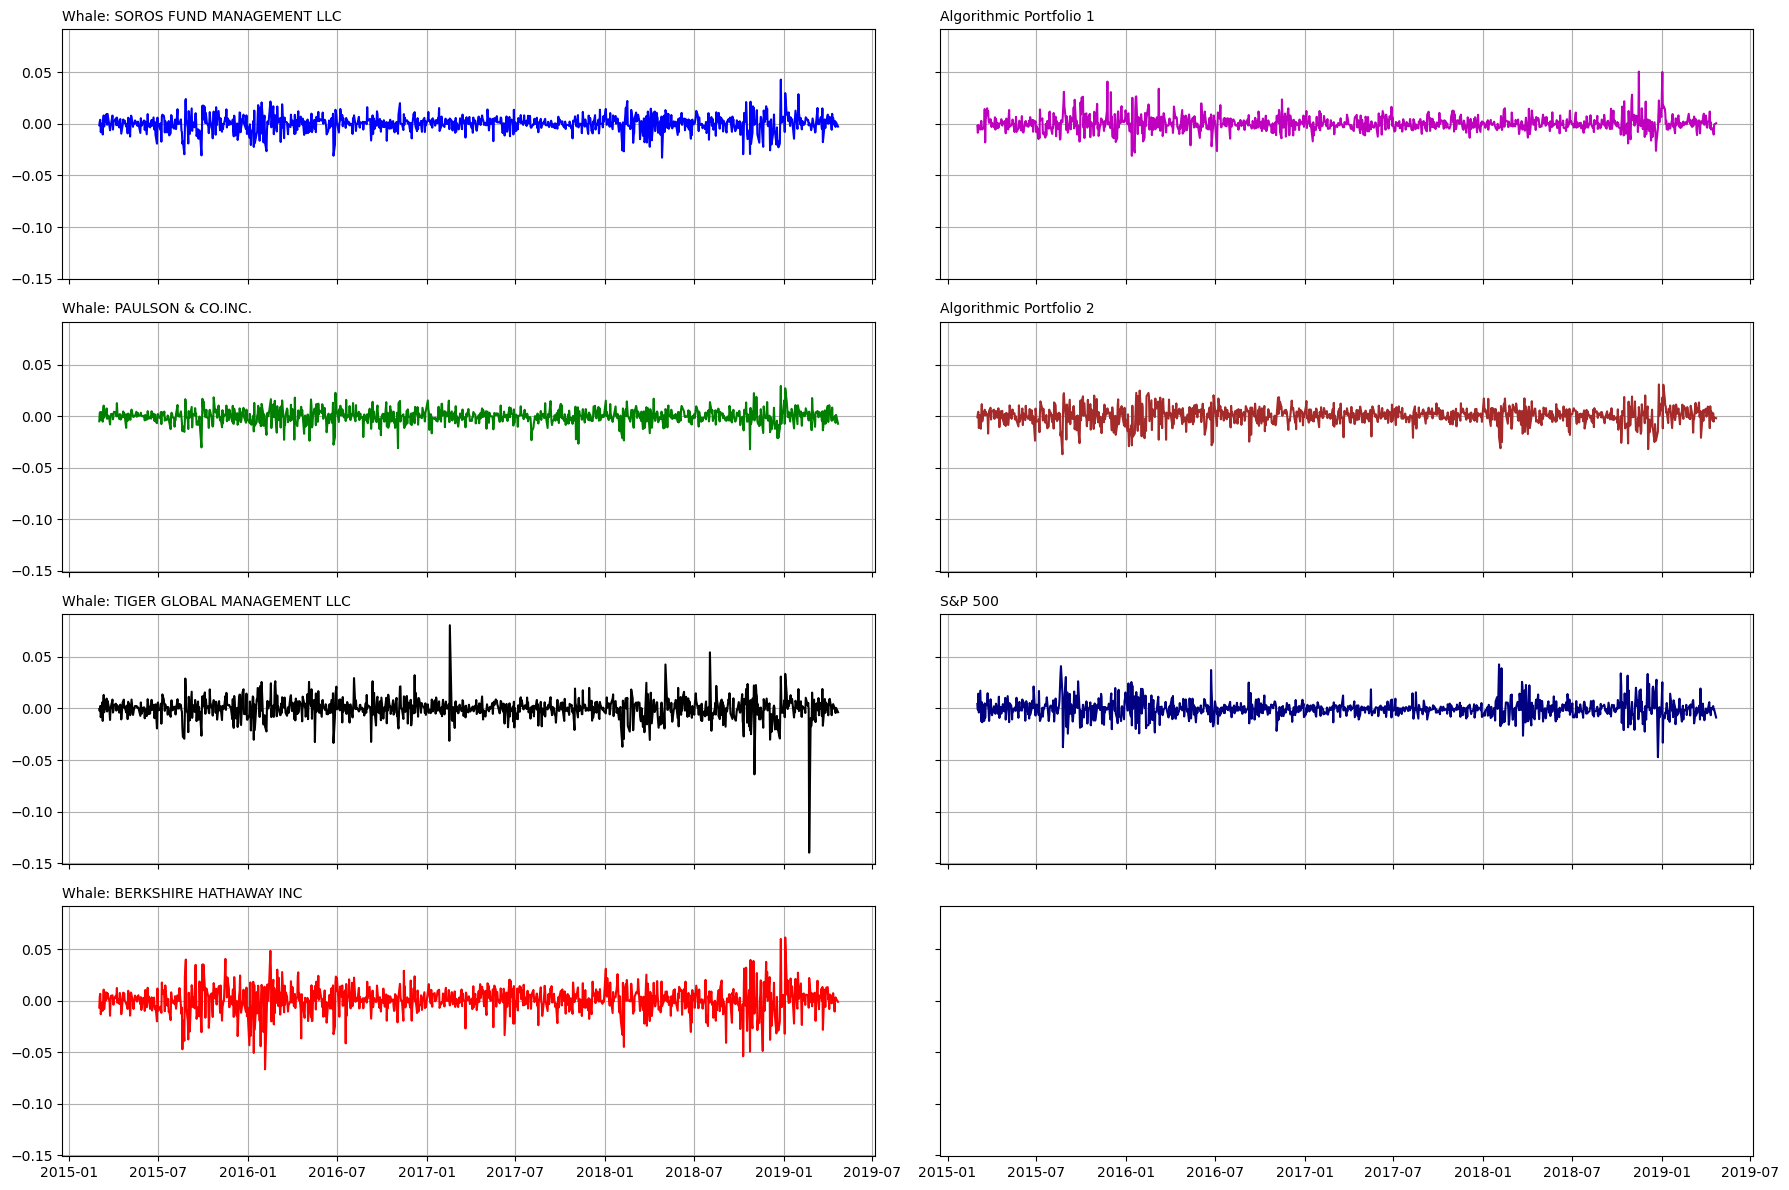

In [21]:
# Plot daily returns of all portfolios
# Plot daily returns of all portfolios
fig, axs = plt.subplots(4,2, sharex = True, sharey = True, figsize=(18,12))

#fig.suptitle("Daily Returns")

#plot 1
axs[0,0].plot(all_daily_returns["Soros"], color="b")
axs[0,0].set_title("Whale: SOROS FUND MANAGEMENT LLC", loc="left", fontsize = 10)
axs[0,0].grid(True)
#axs[0,0].set_xlabel('date')
#axs[0,0].set_ylabel('%')

#plot 2
axs[1,0].plot(all_daily_returns["Paulson"], color="g")
axs[1,0].set_title("Whale: PAULSON & CO.INC.", loc="left", fontsize = 10)
axs[1,0].grid(True)

#plot 3
axs[2,0].plot(all_daily_returns["Tiger"], color="k")
axs[2,0].set_title("Whale: TIGER GLOBAL MANAGEMENT LLC", loc="left", fontsize = 10)
axs[2,0].grid(True)

#plot 4
axs[3,0].plot(all_daily_returns["Berkshire"], color="r")
axs[3,0].set_title("Whale: BERKSHIRE HATHAWAY INC", loc="left", fontsize = 10)
axs[3,0].grid(True)

#plot 5
axs[0,1].plot(all_daily_returns["Algo1"], color="m")
axs[0,1].set_title("Algorithmic Portfolio 1", loc="left", fontsize = 10)
axs[0,1].grid(True)

#plot 6
axs[1,1].plot(all_daily_returns["Algo2"], color="brown")
axs[1,1].set_title("Algorithmic Portfolio 2", loc="left", fontsize = 10)
axs[1,1].grid(True)

#plot 7
axs[2,1].plot(all_daily_returns["sp500"], color="navy")
axs[2,1].set_title("S&P 500", loc="left", fontsize = 10)
axs[2,1].grid(True)


fig.tight_layout()
plt.show()

#### Calculate and Plot cumulative returns.

<AxesSubplot:title={'center':'Cumulative Returns fo all portfolios'}, xlabel='Date'>

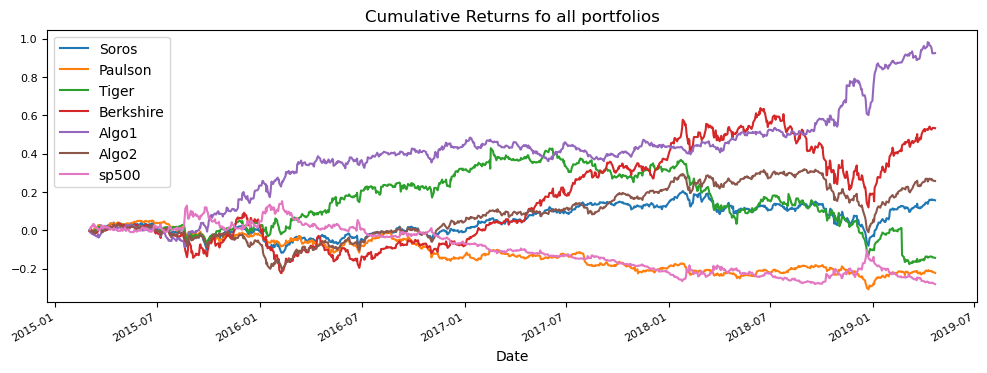

In [66]:
# Calculate cumulative returns of all portfolios
cumulative_returns = (1 + all_daily_returns).cumprod()-1

# Plot cumulative returns
cumulative_returns.plot(figsize=(12,4), fontsize = 8, title = "Cumulative Returns fo all portfolios")

---

## Risk Analysis

Determine the _risk_ of each portfolio:

1. Create a box plot for each portfolio. 
2. Calculate the standard deviation for all portfolios
4. Determine which portfolios are riskier than the S&P 500
5. Calculate the Annualized Standard Deviation

### Create a box plot for each portfolio


<AxesSubplot:title={'center':'Box Plot: Daily returns for each portfolio'}>

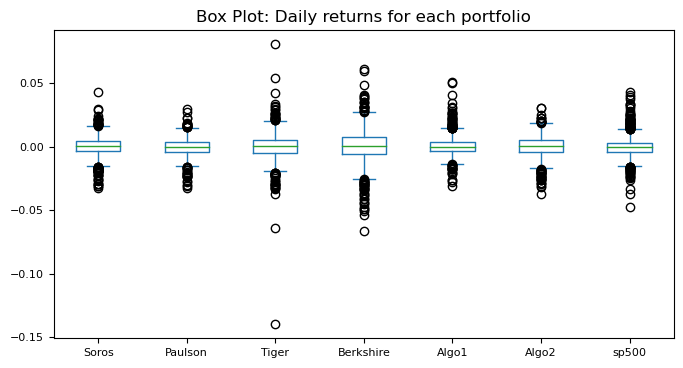

In [80]:
# Box plot to visually show risk
all_daily_returns.plot.box(figsize =(8,4), fontsize = 8, title = "Box Plot: Daily returns for each portfolio")

### Calculate Standard Deviations

In [39]:
# Calculate the daily standard deviations of all portfolios
daily_sd = all_daily_returns.std()
daily_sd

Soros        0.007896
Paulson      0.007026
Tiger        0.010897
Berkshire    0.012919
Algo1        0.007623
Algo2        0.008341
sp500        0.008587
dtype: float64

### Determine which portfolios are riskier than the S&P 500

In [43]:
# Calculate  the daily standard deviation of S&P 500
sp500_sd = round(all_daily_returns['sp500'].std(),6)
sp500_sd

0.008587

In [58]:
# Determine which portfolios are riskier than the S&P 500
daily_sd.loc[daily_sd.iloc[:] > sp500_sd]

Tiger        0.010897
Berkshire    0.012919
dtype: float64

### Calculate the Annualized Standard Deviation

In [61]:
# Calculate the annualized standard deviation (252 trading days)
ann_sd = daily_sd*np.sqrt(252)
ann_sd

Soros        0.125348
Paulson      0.111527
Tiger        0.172989
Berkshire    0.205079
Algo1        0.121006
Algo2        0.132413
sp500        0.136313
dtype: float64

---

## Rolling Statistics

Risk changes over time. Analyze the rolling statistics for Risk and Beta. 

1. Calculate and plot the rolling standard deviation for all portfolios using a 21-day window
2. Calculate the correlation between each stock to determine which portfolios may mimick the S&P 500
3. Choose one portfolio, then calculate and plot the 60-day rolling beta between it and the S&P 500

### Calculate and plot rolling `std` for all portfolios with 21-day window

In [74]:
# Calculate the rolling standard deviation for all portfolios using a 21-day window
rolling_sd = all_daily_returns.rolling(21).std()
rolling_sd = rolling_sd.dropna()
rolling_sd.head()

,Soros,Paulson,Tiger,Berkshire,Algo1,Algo2,sp500
Date,,,,,,,
2015-03-31,0.005764,0.004641,0.006731,0.007108,0.007866,0.006867,0.009106
2015-04-01,0.005744,0.004467,0.006750,0.007005,0.007886,0.006894,0.009128
2015-04-02,0.005749,0.004502,0.006739,0.006958,0.007601,0.006955,0.009260
2015-04-06,0.005792,0.004492,0.006786,0.006884,0.007648,0.007028,0.008711
2015-04-07,0.005452,0.004385,0.006486,0.006193,0.007531,0.006530,0.008687


<AxesSubplot:>

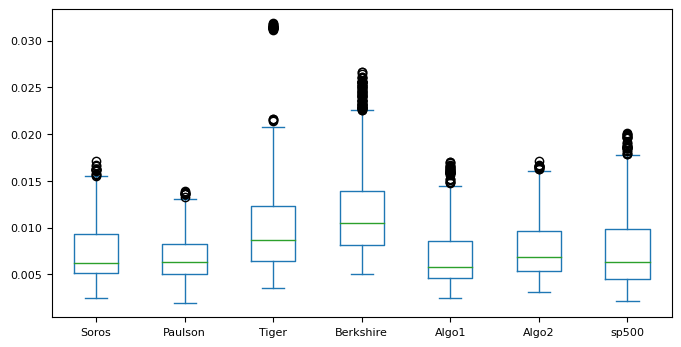

In [79]:
# Plot the rolling standard deviation
rolling_sd.plot.box(figsize =(8,4), fontsize = 8)

### Calculate and plot the correlation

In [ ]:
# Calculate the correlation

# Display de correlation matrix


### Calculate and Plot Beta for a chosen portfolio and the S&P 500

In [ ]:
# Calculate covariance of a single portfolio

# Calculate variance of S&P 500

# Computing beta

# Plot beta trend


## Rolling Statistics Challenge: Exponentially Weighted Average 

An alternative way to calculate a rolling window is to take the exponentially weighted moving average. This is like a moving window average, but it assigns greater importance to more recent observations. Try calculating the [`ewm`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.ewm.html) with a 21-day half life for each portfolio, using standard deviation (`std`) as the metric of interest.

In [ ]:
# Use `ewm` to calculate the rolling window


---

# Sharpe Ratios
In reality, investment managers and thier institutional investors look at the ratio of return-to-risk, and not just returns alone. After all, if you could invest in one of two portfolios, and each offered the same 10% return, yet one offered lower risk, you'd take that one, right?

### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [ ]:
# Annualized Sharpe Ratios


In [ ]:
# Visualize the sharpe ratios as a bar plot


### Determine whether the algorithmic strategies outperform both the market (S&P 500) and the whales portfolios.

Write your answer here!

---

# Create Custom Portfolio

In this section, you will build your own portfolio of stocks, calculate the returns, and compare the results to the Whale Portfolios and the S&P 500. 

1. Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.
2. Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock
3. Join your portfolio returns to the DataFrame that contains all of the portfolio returns
4. Re-run the performance and risk analysis with your portfolio to see how it compares to the others
5. Include correlation analysis to determine which stocks (if any) are correlated

## Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.

In [ ]:
# Reading data from 1st stock


In [ ]:
# Reading data from 2nd stock


In [ ]:
# Reading data from 3rd stock


In [ ]:
# Combine all stocks in a single DataFrame


In [ ]:
# Reset Date index


In [ ]:
# Reorganize portfolio data by having a column per symbol


In [ ]:
# Calculate daily returns

# Drop NAs

# Display sample data


## Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock

In [ ]:
# Set weights
weights = [1/3, 1/3, 1/3]

# Calculate portfolio return

# Display sample data


## Join your portfolio returns to the DataFrame that contains all of the portfolio returns

In [ ]:
# Join your returns DataFrame to the original returns DataFrame


In [ ]:
# Only compare dates where return data exists for all the stocks (drop NaNs)


## Re-run the risk analysis with your portfolio to see how it compares to the others

### Calculate the Annualized Standard Deviation

In [ ]:
# Calculate the annualized `std`


### Calculate and plot rolling `std` with 21-day window

In [ ]:
# Calculate rolling standard deviation

# Plot rolling standard deviation


### Calculate and plot the correlation

In [ ]:
# Calculate and plot the correlation


### Calculate and Plot Rolling 60-day Beta for Your Portfolio compared to the S&P 500

In [ ]:
# Calculate and plot Beta


### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [ ]:
# Calculate Annualized Sharpe Ratios


In [ ]:
# Visualize the sharpe ratios as a bar plot


### How does your portfolio do?

Write your answer here!